# King Kohli in the Spotlight: A Text Mining Showdown Between TF-IDF and Word Embeddings in Cricket Commentary
The digital age has transformed how sports figures are discussed, with platforms like Reddit serving as rich repositories of public sentiment and discourse.

In a previous research, I scraped comments from [r/Cricket](https://www.reddit.com/r/Cricket/) for a gendered language analysis. One notable finding from that analysis was the widespread discussion surrounding Virat Kohli, a player who has cut a huge figure in international cricket. Building on that, this comparative study focuses specifically on Kohli, using text mining techniques to examine how his presence in cricket discourse is framed.

Specifically, this study examines the clustering of redditors' comments about Kohli using two popular text representation techniques:

1.   TF-IDF
2.   Word Embeddings

Both methods aim to uncover latent thematic structures in the data, but they differ significantly in how they interpret language—TF-IDF emphasizes lexical frequency and uniqueness, whereas word embeddings capture semantic and contextual relationships.

By applying K-Means clustering and visualizing the results using PCA, this analysis explores how each method shapes the grouping of commentary, revealing differences in tone, content, and underlying sentiment.

The comparative approach not only highlights the strengths and limitations of each technique but also provides insight into how computational methods can surface patterns in online discourse about public figures.

In [18]:
#Step 0: Installation and importing of necessary packages and modules
!pip install spacy
!python -m spacy download en_core_web_md
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 53.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.4 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.4 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.4 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.5/33.5 MB 31.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter o

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

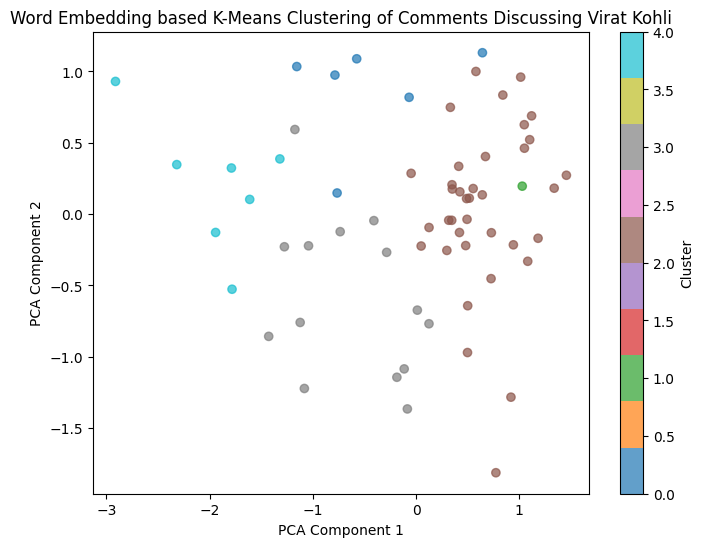

Number of clusters: 5

Cluster 0:
- I would like to thank Virat Kohli's dad for not using a condom....
- Pakistan won the match but Virat Kohli won our hearts showing his grace when he hugged the openers....
- I want to pity someone as much as Virat kohli pities Pakistan. Everytime he plays them, he just bashes them...
- Where is the Virat Kohli apology form? I thought he'd lost it forever. Looks like it comes and goes....
- Fucking incredible. And him yelling at the pitch (Virat Kohli Supersport style) after missing the ball...

Cluster 1:
- Don't worry the previous over was a masterstroke by Virat Kohli in order to get rid of the Indian aging population with heart conditions. Now we will ...

Cluster 2:
- After all the hard work, setbacks, public backlash, and immense pressure, Rohit Sharma and Virat Kohli have earned a good retirement. One of the best ...
- Finally bro. The curse is broken. I think India is the strongest ever right now. Everyone had their own contributions for this 

In [24]:
# Step 1: Loading the data
df = pd.read_csv("reddit_data.csv")

# Step 2: Filtering comments that mention Virat Kohli
df['comment_body'] = df['comment_body'].astype(str)
virat_comments = df[df['comment_body'].str.contains('Virat Kohli', case=False, na=False)]

# Step 3: Loading spaCy's pre-trained word embeddings
nlp = spacy.load('en_core_web_md') #The medium model was used to compensate for the large amounts of comments, while avoiding the delayed loading capacity of the large model.

# Step 4: Function to get the average word vector for a comment
def get_avg_word_vector(comment, model):
    doc = model(comment)
    # Get word vectors for non-stop words
    word_vectors = [token.vector for token in doc if not token.is_stop and not token.is_punct]
    if len(word_vectors) == 0:
        return np.zeros(model.vector_size)  # Return a zero vector if no valid words
    return np.mean(word_vectors, axis=0)

# Step 5: Getting embeddings for all Virat Kohli comments
embeddings = np.array([get_avg_word_vector(comment, nlp) for comment in virat_comments['comment_body']])

# Step 6: Performing K-Means clustering on the embeddings
n_clusters = 5  # Adjust the number of clusters as needed
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(embeddings)

# Step 7: Visualizing the clustering results with PCA
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(embeddings)

plt.figure(figsize=(8, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=kmeans_labels, cmap='tab10', alpha=0.7)
plt.title("Word Embedding based K-Means Clustering of Comments Discussing Virat Kohli")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label='Cluster')
plt.show()

# Step 8: Printing the number of clusters and the comments for each cluster
print(f"Number of clusters: {n_clusters}")
for i in range(n_clusters):
    print(f"\nCluster {i}:")
    cluster_comments = virat_comments[kmeans_labels == i]['comment_body']
    for comment in cluster_comments.head(5):  # Only top 5 comments of each cluster
        print(f"- {comment[:150]}...")  # Only first 150 characters of each comment

Using word embeddings for clustering reveals deeper semantic patterns in the comments about Virat Kohli. This method captures meaning and context, allowing it to group together comments that express similar emotions or intentions, even if the wording differs significantly. For instance, one cluster consists of reflective and nostalgic comments about Kohli's legacy and retirement, while another contains intense fan devotion and emotional apologies for doubting his performance.

There’s also a mix of sarcasm, banter, and dark humor—highlighting how this method picks up not just what people say, but how they say it.

The clusters are more spread out in PCA space, showing the nuanced conceptual differences between them, such as admiration, criticism, sentimentality, and satire.

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

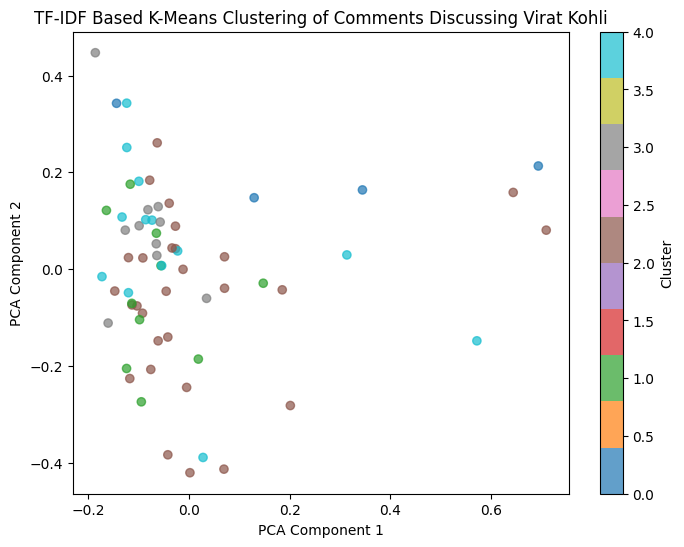

Number of clusters: 5

Cluster 0:
- Lost to SA, Struggled against Bangladesh (who doesn't have a power hitter or even a good death bowler), only won against Pakistan due to two reasons: ...
- Pakistan won the match but Virat Kohli won our hearts showing his grace when he hugged the openers....
- I headed out with Rohit Sharma to tour his farm, and he started introducing me to some of the livestock, mentioning how he had named them after his pl...
- I want to pity someone as much as Virat kohli pities Pakistan. Everytime he plays them, he just bashes them...

Cluster 1:
  
  
Congratulations, ~~Virat Kohli~~ Travis Head...
- I would like to thank Virat Kohli's dad for not using a condom....
- **Last 6 50+ Scores for India in T20WC**

Virat Kohli - 57 vs PAK (Today)*

Virat Kohli - 89* vs WI

Virat Kohli - 82* vs AUS

Virat Kohli - 55* vs PA...
- Virat Kohli has left the chat followed by Adam Zampa....
- For the ungrateful Indian fans; the first innings showed the importance of Rohit Sha

In [23]:
# Step 1: Assume virat_comments is already filtered and ready
texts = virat_comments['comment_body'].tolist()

# Step 2: TF-IDF vectorization
tfidf = TfidfVectorizer(stop_words='english', max_df=0.95, min_df=2)
X = tfidf.fit_transform(texts)

# Step 3: K-Means clustering
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

# Step 4: Visualize the clustering results with PCA
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X.toarray())

plt.figure(figsize=(8, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=kmeans_labels, cmap='tab10', alpha=0.7)
plt.title("TF-IDF Based K-Means Clustering of Comments Discussing Virat Kohli")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label='Cluster')
plt.show()

# Step 15: Print the number of clusters and the comments for each cluster
print(f"Number of clusters: {n_clusters}")
for i in range(n_clusters):
    print(f"\nCluster {i}:")
    cluster_comments = virat_comments[kmeans_labels == i]['comment_body']
    for comment in cluster_comments.head(5):  # Print top 5 comments in each cluster
        print(f"- {comment[:150]}...")  # Show the first 150 characters of each comment


TF-IDF-based clustering groups comments based on the frequency and uniqueness of words. This method is more literal and topic-oriented, leading to clusters that revolve around match analysis, player performance, statistics, or specific events. For example, one cluster focuses on Kohli's recent milestones and match-winning knocks, while another critiques team dynamics or offers praise for other players like Shami.

The tone across clusters ranges from emotional to analytical, but the clusters are more syntactically driven.

In PCA space, these clusters appear more compact and densely arranged, reflecting surface-level textual differences rather than deeper semantic similarities.